In [1]:
import pandas as pd
train=pd.read_csv("train.csv")
train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


# preprocessing

In [2]:
train.Dataset.value_counts()

1    333
2    133
Name: Dataset, dtype: int64

In [3]:
train=train.dropna(how='any', axis = 0)

In [4]:
feature_cols=["Age","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]
X=train[feature_cols]
y=train.Dataset

# using logistic regression

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
y_pred=logreg.predict(X_test)

In [8]:
k=y_pred==y_test

In [9]:
k.value_counts()/len(y_test)

True     0.706897
False    0.293103
Name: Dataset, dtype: float64

In [10]:
train['Gender'] = train['Gender'].map({'Male':0, 'Female':1})


In [11]:
train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,0,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,1,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,0,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,0,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1


# using logistic regression after encoding gender values

In [12]:
feature_cols=["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]
X=train[feature_cols]
y=train.Dataset

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
k=y_pred==y_test
k.value_counts()/len(y_test)

True     0.715517
False    0.284483
Name: Dataset, dtype: float64

In [15]:
logreg.coef_

array([[-0.01207012, -0.26416955, -0.01654722, -0.54617409, -0.00236328,
        -0.00876097, -0.00348653, -0.05996576,  0.46107842, -0.13145034]])

# using random forest classifier

In [16]:
feature_cols=["Age","Gender","Direct_Bilirubin","Alkaline_Phosphotase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]
X=train[feature_cols]
y=train.Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2 )

In [17]:
#applying random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 1000)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
k=y_pred==y_test
k.value_counts()/len(y_test)

True     0.72043
False    0.27957
Name: Dataset, dtype: float64

# using svm

In [18]:
feature_cols=["Age","Gender","Direct_Bilirubin","Alkaline_Phosphotase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]
X=train[feature_cols]
y=train.Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3 )

In [19]:
from sklearn import svm
clf = svm.SVC( kernel="rbf",probability=True,C=0.1, decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [20]:
k=y_pred==y_test
k.value_counts()/len(y_test)

True     0.726619
False    0.273381
Name: Dataset, dtype: float64

In [21]:
import seaborn as sns
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=train, kind="reg")

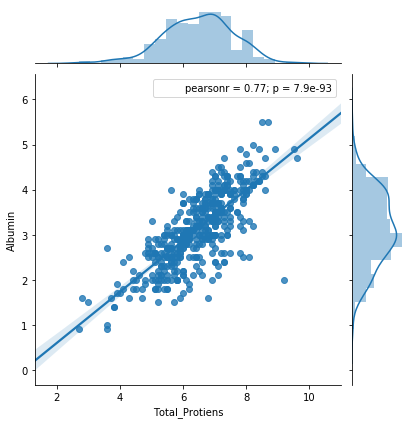

In [22]:
sns.jointplot("Total_Protiens", "Albumin", data=train, kind="reg")

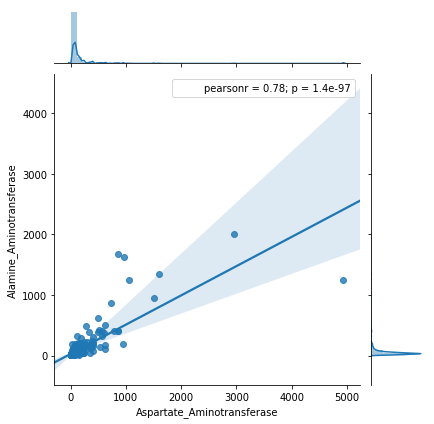

In [23]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=train, kind="reg")

# Since there seems a direct relationship between them ,so during features selection we can keep one feature from each of them.So , removing total bilrubrin and alamine aminotransferase

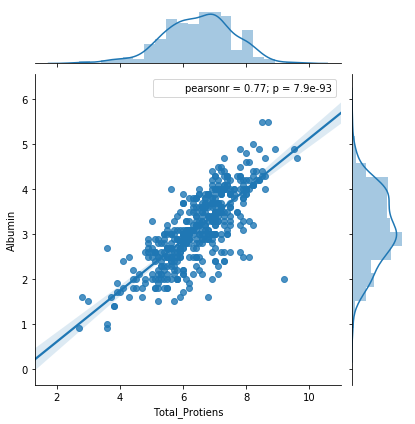

In [24]:
sns.jointplot("Total_Protiens", "Albumin", data=train, kind="reg")

In [25]:
feature_cols=["Age","Gender","Total_Bilirubin","Alkaline_Phosphotase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]
X=train[feature_cols]
y=train.Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2 )

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=100000,tol=1e-2)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
k=y_pred==y_test
k.value_counts()/len(y_test)

True     0.752688
False    0.247312
Name: Dataset, dtype: float64

# svm after removing features

In [27]:
feature_cols=["Age","Gender","Direct_Bilirubin","Alkaline_Phosphotase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]
X=train[feature_cols]
y=train.Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2 )

In [28]:
from sklearn import svm
clf = svm.SVC( kernel="rbf",probability=True,C=0.1, decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [29]:
k=y_pred==y_test
k.value_counts()/len(y_test)

True     0.741935
False    0.258065
Name: Dataset, dtype: float64

# saving to csv

In [30]:
test=pd.read_csv("test.csv")
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [31]:
test['Gender'] = test['Gender'].map({'Male':0, 'Female':1})

In [32]:
test=test.fillna(test.mean())

In [33]:
feature_cols=["Age","Gender","Total_Bilirubin","Alkaline_Phosphotase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]
X_train=train[feature_cols]
y_train=train.Dataset
#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2 )

In [34]:
X_test=test[feature_cols]

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=100000,tol=1e-2)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [36]:
y_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [37]:
len(y_pred)

117

In [39]:
res=pd.DataFrame({'Dataset':y_pred})

In [41]:
res.head()

,Dataset
0,1
1,1
2,1
3,2
4,1


In [40]:
res.to_csv("solution.csv")